In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects

import os
import pickle
import math
import logging
import numpy as np
import pandas as pd
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_no_labels/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
print('Done loading subjects')
cluster = Cluster.create(subjects, config)

logger.info('Training model')
cluster.train()
pred = cluster.predictions
logger.info('Done training network')

Using TensorFlow backend.


{'nodes': [500, 500, 2000, 10], 'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'update_interval': 140, 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'n_clusters': 50, 'momentum': 0.9, 'lr': 0.01, 'tol': 0.001, 'maxiter': 20000.0, 'save_dir': 'mnt/dec/dec_no_labels', 'batch_size': 256}
Done loading subjects
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)     

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [50]:
sample = subjects._sample_s(100000)
order, charges, rotation = sample.get_charge_array(True)
pred = cluster.dec.predict_clusters(charges)

number of subjects 70712


In [72]:
a = np.reshape(pred, (len(pred)//6, 6))
a[0,1]=19
# print(a)
b=np.zeros_like(a, dtype=bool)
for i, row in enumerate(a[:,]):
    b[i,]=(row==row[0])

d = np.zeros((len(b), 1))
for i, row in enumerate(b[:,1:]):
    d[i] = np.sum(row)

    
n=len(np.where(d>=3)[0])
print('Subjects where at least x rotations were in the same cluster as the original:')

e = np.zeros((6), dtype=int)
for i in range(1,6):
    n = 6-i
    e[i]= len(np.where(d>=i)[0])
    
display(pd.DataFrame(e))


Subjects where at least x rotations were in the same cluster as the original:


0
0     0
1  7273
2  2832
3  2211
4  1930
5  1829

Shows that out of 70712 subjects, only there are only 1829 where all six rotations ended up in the same cluster as the original image. 7273 subjects had at least one of its rotations end up in the same cluster.

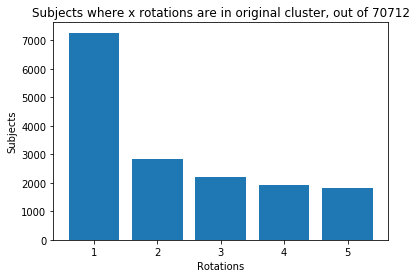

In [83]:
plt.bar(np.arange(1,6), e[1:])
plt.title('Subjects where x rotations are in original cluster, out of 70712')
plt.xlabel('Rotations')
plt.ylabel('Subjects')
plt.show()

number of subjects 1829


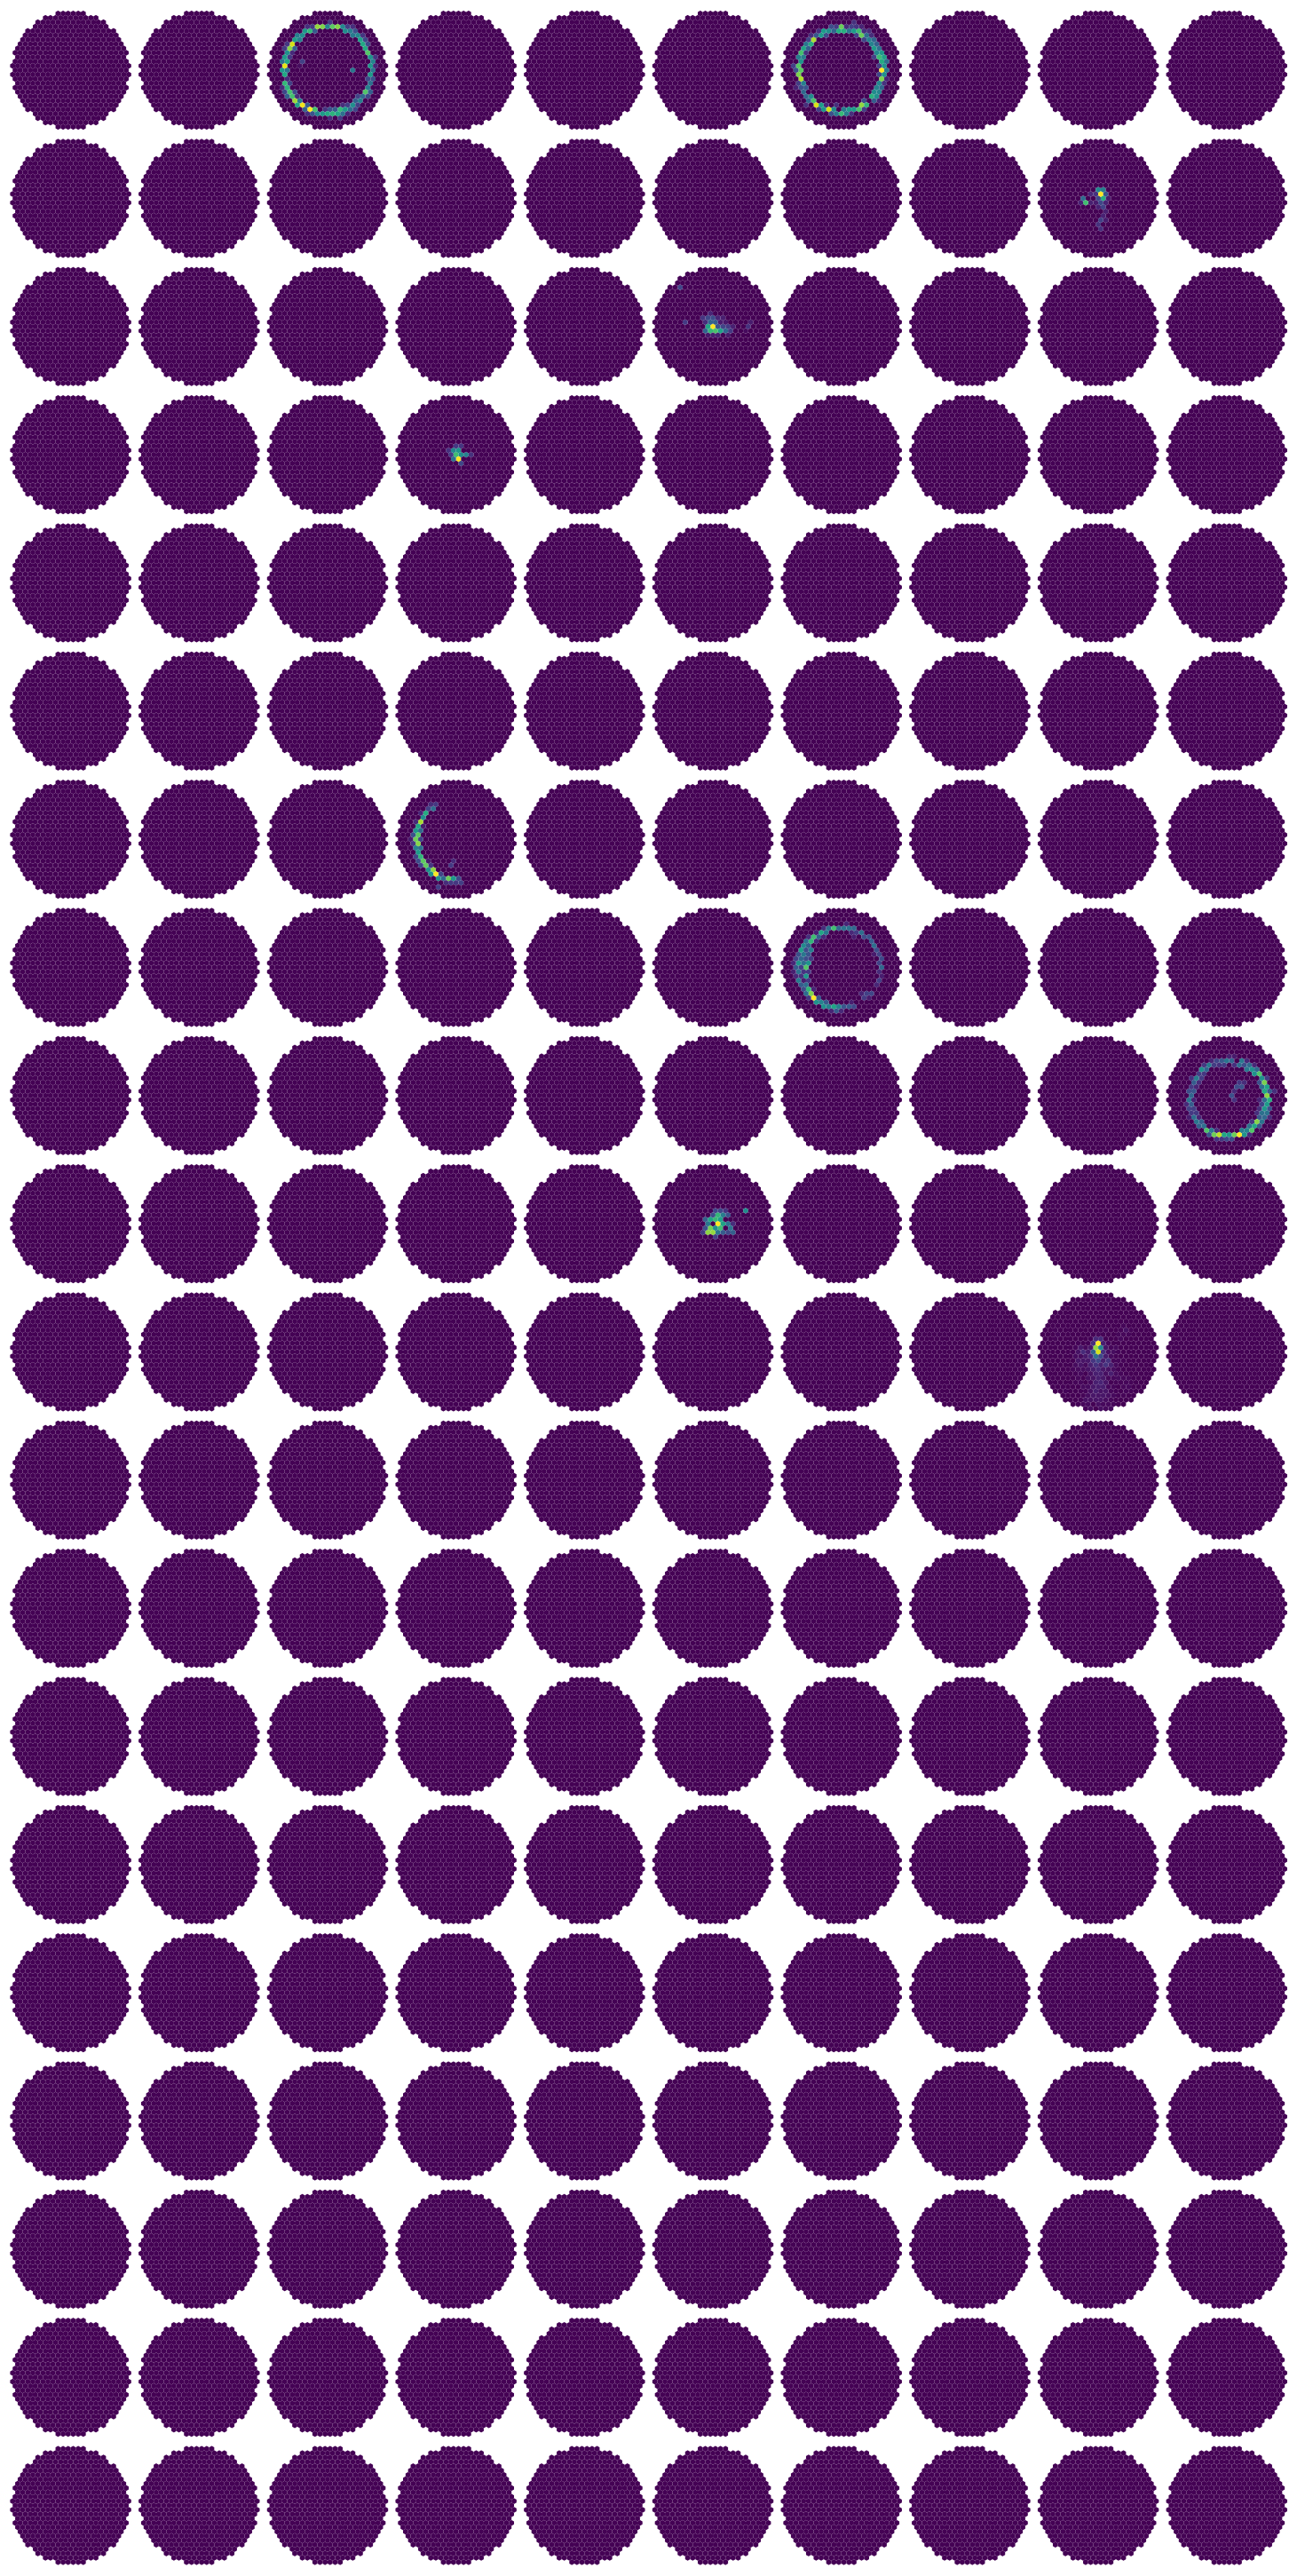

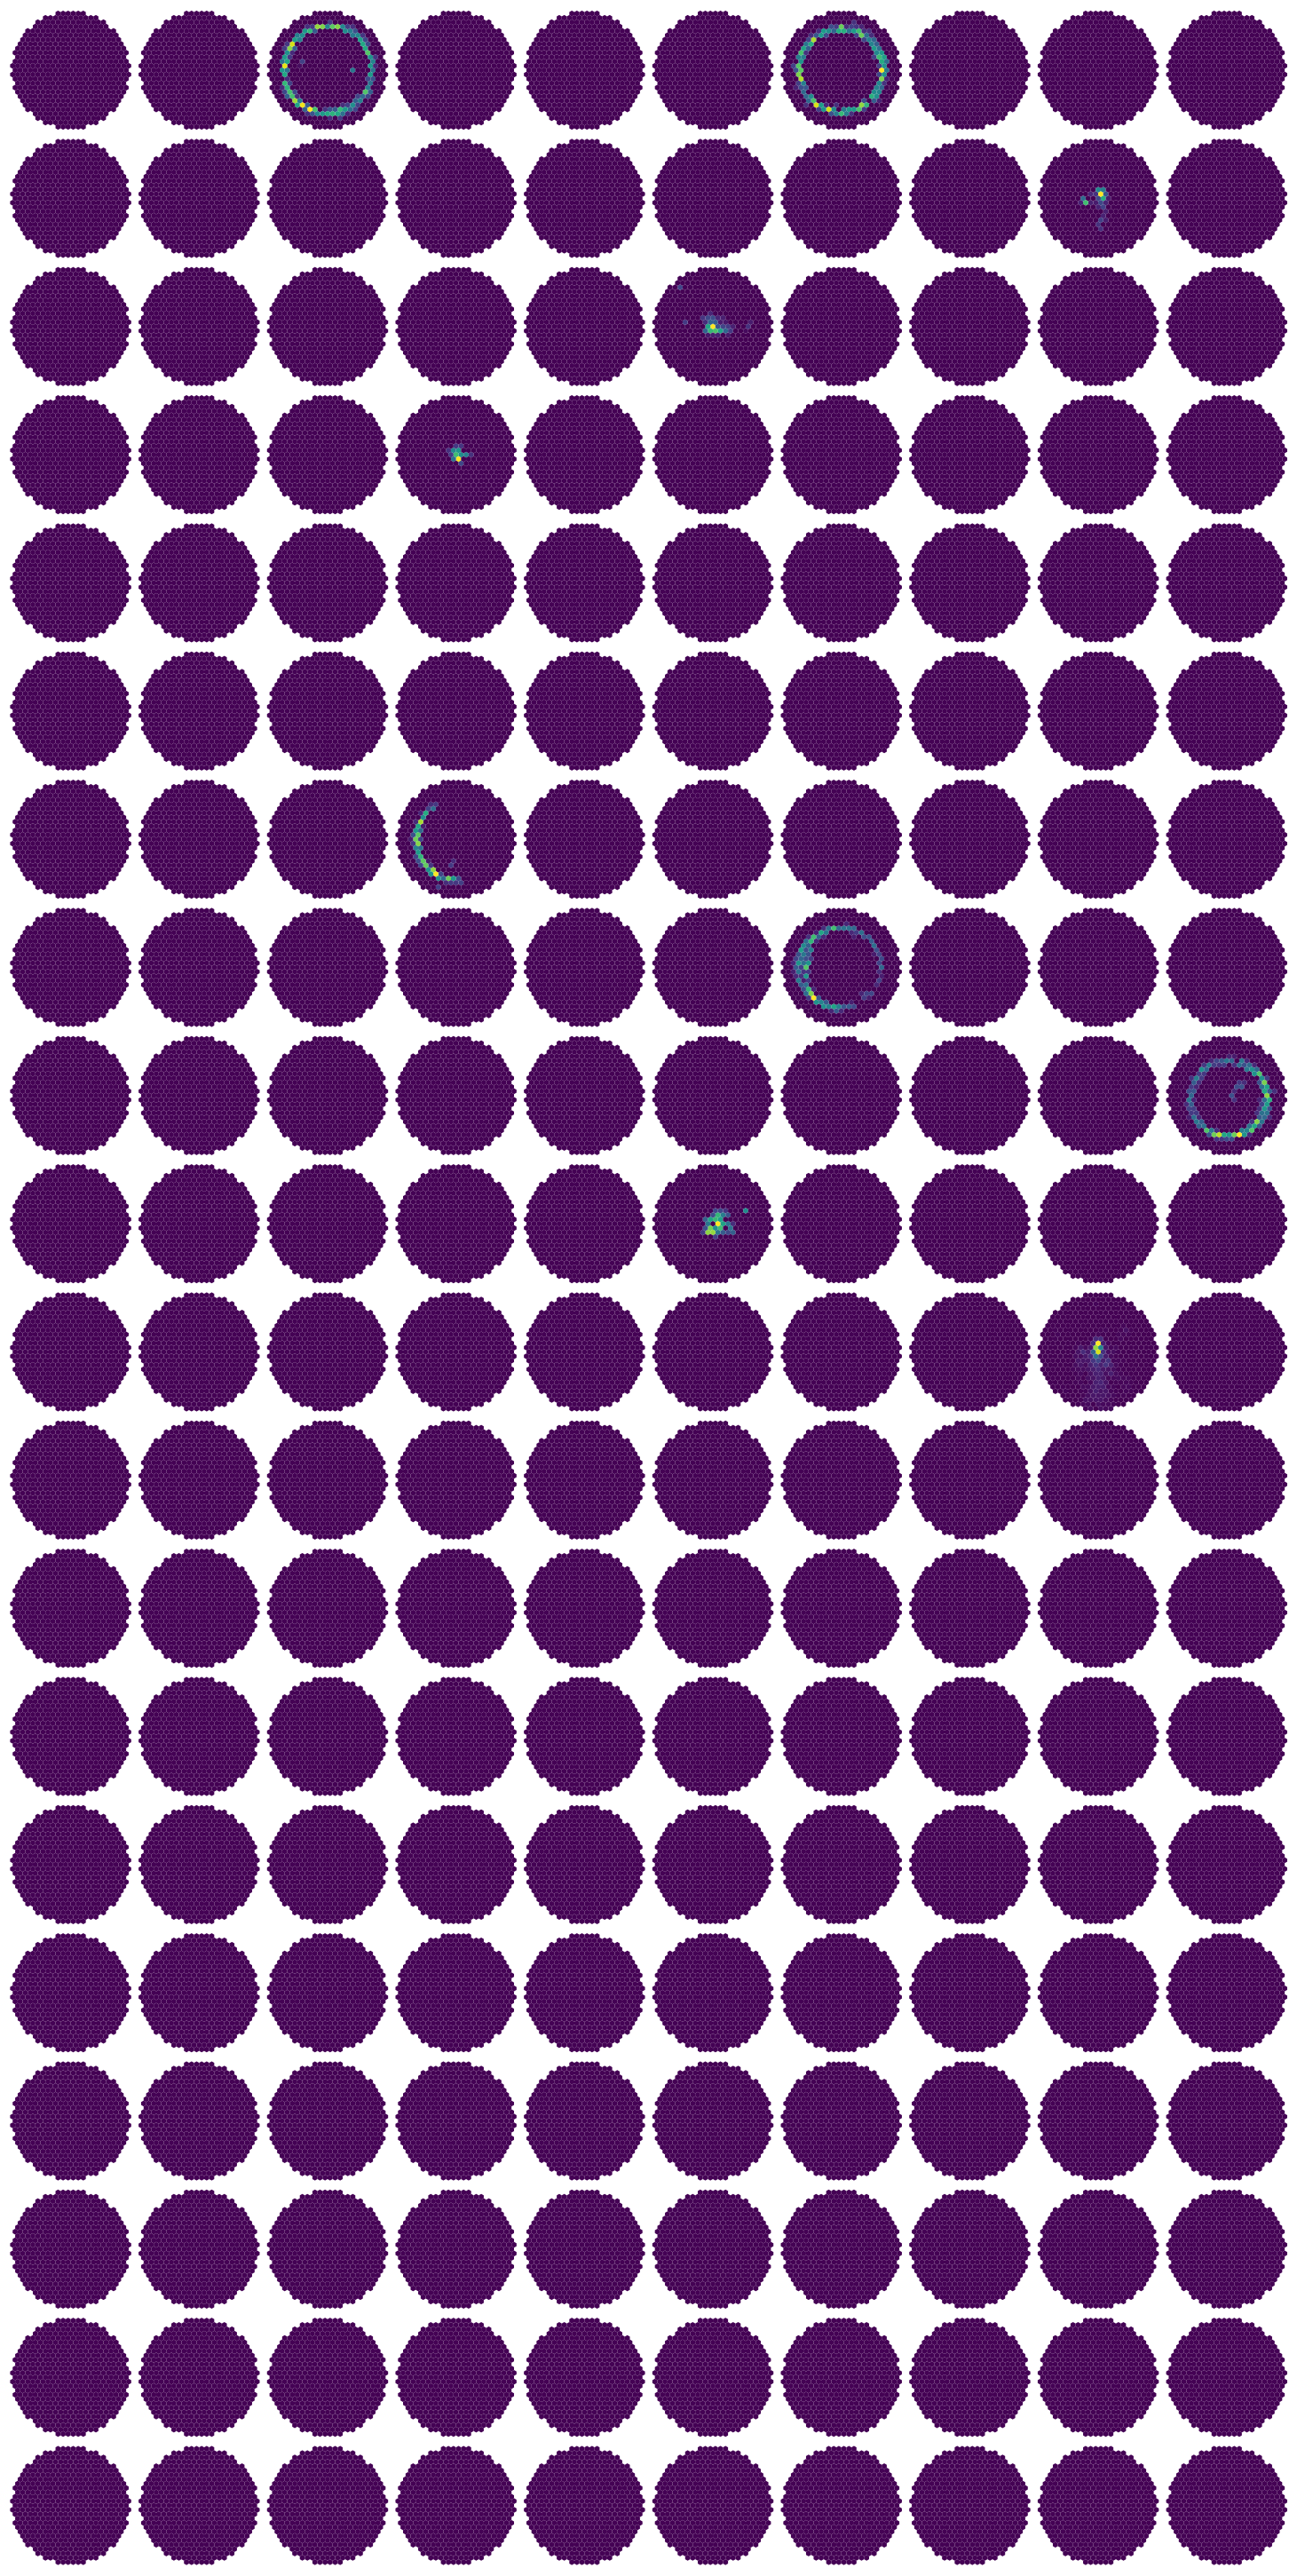

In [98]:
loc=np.where(d>=5)[0]
keys=np.array(sample.keys())[loc]
subjects.subset(keys).plot_sample(200, w=10)